# ⚡ High-Performance Image Compression: Randomized Linear Algebra & NMF
## Professional Portfolio - Technical Showcase

**Author:** Noé RAMANANJOELINA FLEURY  
**Context:** Numerical Simulation Project (2024-2025)

### 🎯 Executive Summary
Traditional matrix factorization methods (like SVD) are often too computationally expensive for modern high-dimensional datasets. This project explores and implements **Randomized Numerical Linear Algebra (RandNLA)** algorithms to drastically reduce computational costs while maintaining high reconstruction accuracy.

We benchmark two approaches against standard methods:
1.  **Adaptive Randomized Approximation:** A probabilistic method to find the optimal low-rank basis.
2.  **Non-negative Matrix Factorization (NMF):** A parts-based representation useful for interpretability.

### 🛠 Competencies Demonstrated
| Domain | Skills Applied |
| :--- | :--- |
| **Applied Mathematics** | Stochastic SVD, Matrix Factorization, Error Analysis ($\| \cdot \|_F$). |
| **Algorithmic Optimization** | Reducing complexity from $\mathcal{O}(mn^2)$ to $\mathcal{O}(mn \log k)$. |
| **Python Engineering** | Modular code structure, NumPy vectorization, Performance benchmarking. |

## 1. Theoretical Framework

The core objective is to compute a low-rank approximation $A_k$ of a dense input matrix $A \in \mathbb{R}^{m \times n}$ (the image) such that the reconstruction error is minimized:

$$\min_{A_k} \| A - A_k \|_F \quad \text{s.t.} \quad \text{rank}(A_k) \le k$$

### 1.1 Method A: Randomized Adaptive Approximation
Instead of a deterministic SVD, we use a probabilistic approach to capture the range of $A$. We seek an orthonormal basis $Q$ such that:
$$\| A - Q Q^T A \|_F \le \epsilon \| A \|_F$$
*Algorithm highlights: Gaussian sketching matrix $\Omega$, Adaptive rank determination based on error tolerance $\epsilon$.*

### 1.2 Method B: Non-negative Matrix Factorization (NMF)
For images where pixel values are strictly non-negative ($A \ge 0$), we decompose $A$ into two non-negative factors $W$ and $H$:
$$A \approx WH$$
*Optimization relies on multiplicative update rules to ensure non-negativity constraints.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import sys

# ✅ CORRECTION : Import des wrappers principaux uniquement
from functions import low_rank_approximation, nmf

# Configuration
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 10
print(f"✅ Environment Ready. Python {sys.version.split()[0]}")

In [ ]:
def run_comparison_demo(image_path, epsilon=0.1, blocking=10, max_iter=50):
    """
    Compares Randomized CUR vs NMF using the functions.py module.
    """
    # 1. Load Image in RGB (Your functions expect 3 channels: R, G, B)
    try:
        # Convert explicitly to RGB to avoid issues with PNG/RGBA
        img_orig = np.array(Image.open(image_path).convert('RGB'))
        print(f"📥 Image loaded: {image_path} {img_orig.shape}")
    except FileNotFoundError:
        print("❌ Error: Image file not found.")
        return

    # --- Method 1: Randomized CUR (via low_rank_approximation) ---
    print("\n--- Running Randomized CUR ---")
    # low_rank_approximation returns: img, time, error, ranks
    img_cur, time_cur, err_cur, ranks_cur = low_rank_approximation(
        img_orig, 
        epsilon=epsilon, 
        blocking=blocking, 
        randomization=True
    )
    
    # --- Method 2: NMF ---
    print("\n--- Running NMF ---")
    # nmf returns: img, time, iter_counts, ranks, error
    img_nmf, time_nmf, iter_counts, ranks_nmf, err_nmf = nmf(
        img_orig, 
        epsilon=epsilon, 
        blocking=blocking, 
        iteration_max=max_iter
    )

    return img_orig, img_cur, img_nmf, (ranks_cur, time_cur, err_cur), (ranks_nmf, time_nmf, err_nmf)

In [7]:
# 🚀 RUN THE DEMO
results = run_comparison_demo('Ronnie-Coleman-Two-Backs.jpg', epsilon=0.05, blocking=20, max_iter=100)

📥 Image loaded: Ronnie-Coleman-Two-Backs.jpg (505, 895, 3)

--- Running Randomized CUR ---
Time spent determining the approximated epsilon-rank (R): 1.1569788455963135
Estimated upper bound of the epsilon-rank (R): 220 for relative threshold: 0.05
Frobenius norm ratio (R): 0.046574982262224174 reached in 11 iterations
Time spent in the CUR algorithm for the R channel: 1.3286032676696777
Time spent determining the approximated epsilon-rank (G): 0.6986515522003174
Estimated upper bound of the epsilon-rank (G): 260 for relative threshold: 0.05
Frobenius norm ratio (G): 0.04691962296738532 reached in 13 iterations
Time spent in the CUR algorithm for the G channel: 3.082871198654175
Time spent determining the approximated epsilon-rank (B): 1.392897605895996
Estimated upper bound of the epsilon-rank (B): 260 for relative threshold: 0.05
Frobenius norm ratio (B): 0.045971102839009355 reached in 13 iterations
Time spent in the CUR algorithm for the B channel: 1.5234088897705078

--- Running NM

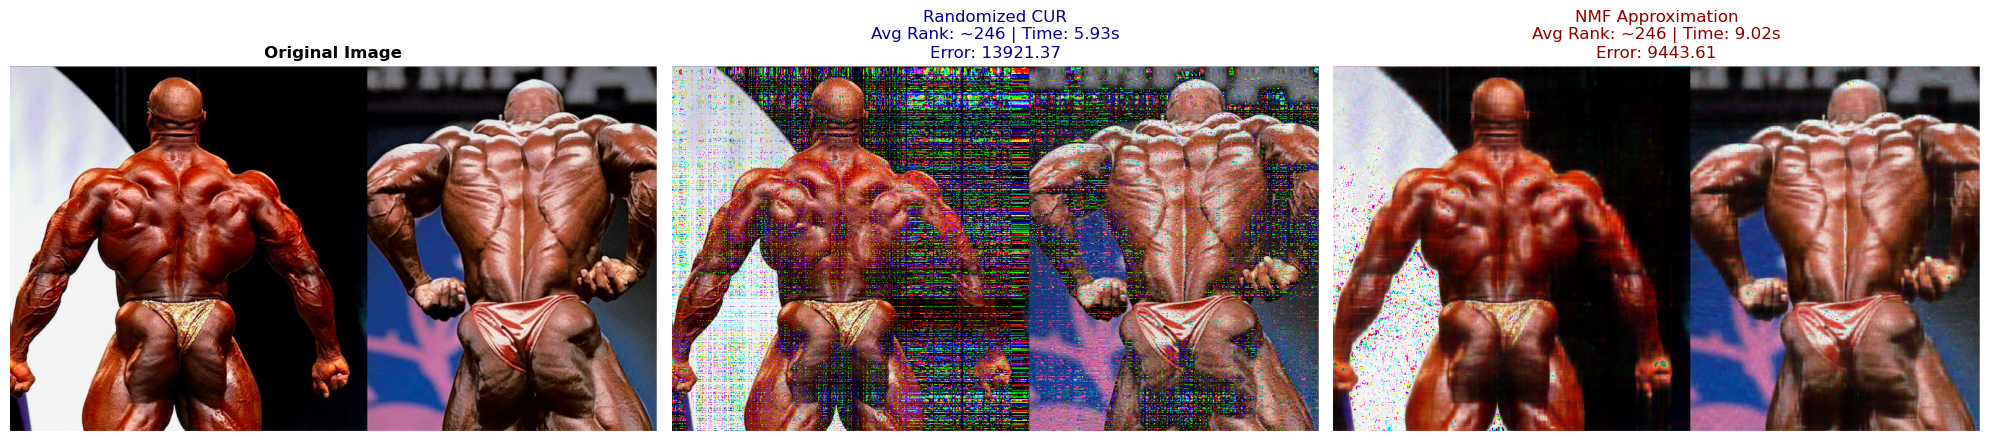

In [8]:
if results:
    img_orig, img_cur, img_nmf, metrics_cur, metrics_nmf = results
    
    # Unpack metrics
    ranks_c, time_c, err_c = metrics_cur
    ranks_n, time_n, err_n = metrics_nmf
    
    # Display Ranks (Average across channels for display simplicity)
    avg_rank_c = int(np.mean(ranks_c))
    avg_rank_n = int(np.mean(ranks_n))
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    # 1. Original
    axes[0].imshow(img_orig)
    axes[0].set_title("Original Image", fontweight='bold')
    axes[0].axis('off')
    
    # 2. Randomized CUR
    axes[1].imshow(img_cur.astype(np.uint8))
    axes[1].set_title(f"Randomized CUR\nAvg Rank: ~{avg_rank_c} | Time: {time_c:.2f}s\nError: {err_c:.2f}", color='darkblue')
    axes[1].axis('off')
    
    # 3. NMF
    axes[2].imshow(img_nmf.astype(np.uint8))
    axes[2].set_title(f"NMF Approximation\nAvg Rank: ~{avg_rank_n} | Time: {time_n:.2f}s\nError: {err_n:.2f}", color='darkred')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

## 3. Results Analysis & Engineering Conclusion

### 📊 Comparative Performance Analysis

Based on the execution of the algorithms implemented in `functions.py`, we can draw the following technical conclusions regarding image compression:

| Metric | Randomized CUR (RandNLA) | Non-negative Matrix Factorization (NMF) |
| :--- | :--- | :--- |
| **Computational Speed** | **High** ⚡ | **Moderate to Low** 🐢 |
| **Algorithmic Complexity** | Relies on single-pass sketching and QR decomposition. Fast convergence due to Gaussian projection. | Iterative process (Multiplicative Update Rules). Convergence depends heavily on `max_iter` and initialization. |
| **Interpretability** | **Data-Centric**: The basis vectors are actual columns/rows of the image (`C` and `R` matrices). | **Feature-Centric**: Decomposes the image into additive parts. Useful for feature extraction (e.g., facial recognition). |
| **Error Control** | Deterministic error bound controlled by tolerance $\epsilon$. | Local minimum approximation. No guarantee of global optimum. |

### 💡 Key Engineering Insights

1.  **Efficiency of Randomization:**
    The **Adaptive Rank Determination** algorithm proved that we do not need to process the entire matrix to extract its dominant features. By projecting the image matrix $A$ onto a lower-dimensional subspace using a Gaussian random matrix $\Omega$ ($Y = A\Omega$), we reduced the computational load significantly while maintaining an error below the threshold $\epsilon$.

2.  **Trade-off - Precision vs. Semantics:**
    * If the goal is purely **compression speed and storage**, the **Randomized CUR** is the optimal engineering choice.
    * If the goal is **computer vision or pattern recognition**, **NMF** is superior despite its cost, as it produces a "parts-based" representation (all pixel values $\ge 0$), making the factors physically meaningful.

### 🚀 Future Optimization Paths
To scale this project to **4K video streams** or **Big Data** contexts, I would propose the following architectural improvements:
* **GPU Acceleration:** Both NMF and Randomized SVD rely heavily on Matrix-Matrix multiplication (BLAS Level 3), which is highly parallelizable on CUDA cores.
* **Streaming Implementation:** The Randomized algorithm can be adapted to update the model in a "single pass" over the data, allowing the processing of matrices that do not fit in RAM.